This notebook will performing some EDA on the 2024-2025 season. Topics in the EDA will be random. An additional objective of this file would be informing decisions to develop a general script to perform similar EDA on the other seasons in `data`.

In [ ]:
# loading libraries 
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing csv file for 2024-2025 season
file_path = os.path.join(os.getcwd(), 'data', '2024-2025.csv')
data_2024_2025 = pd.read_csv(file_path)

In [3]:
# initial inspection of data 
data_2024_2025.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10
5,E0,17/08/2024,15:00,Nott'm Forest,Bournemouth,1,1,D,1,0,...,1.94,1.99,1.94,1.98,2.05,2.00,1.93,1.93,1.96,2.02
6,E0,17/08/2024,17:30,West Ham,Aston Villa,1,2,A,1,1,...,1.83,2.10,1.85,2.09,1.86,2.14,1.82,2.08,1.84,2.18
7,E0,18/08/2024,14:00,Brentford,Crystal Palace,2,1,H,1,0,...,2.07,1.86,2.06,1.88,2.11,1.88,2.05,1.85,2.07,1.92
8,E0,18/08/2024,16:30,Chelsea,Man City,0,2,A,0,1,...,1.94,1.99,1.96,1.97,1.96,2.00,1.90,1.96,1.93,2.07
9,E0,19/08/2024,20:00,Leicester,Tottenham,1,1,D,0,1,...,2.03,1.90,2.02,1.91,2.06,1.92,1.99,1.87,2.03,1.96


In [4]:
# extract teams in alphabetical order
teams = data_2024_2025['HomeTeam'].unique().tolist()
teams = [team for team in teams if pd.notna(team)]
teams.sort()
teams

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Ipswich',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Newcastle',
 "Nott'm Forest",
 'Southampton',
 'Tottenham',
 'West Ham',
 'Wolves']

## League Stats

### League Standings over Games 

We'll first look at how the standings of the teams in the leagues change as matches are played throughout the season. Since schedules are subject to change and every team hasn't played the same number of games at every point in time, we'll look at teams' points after n matches are played (and worry about points at on a particular date later). 

To start we'll create a table showing the cumulative points each team has. From there we're plot these point accumulations over games before moving on to a graphic depicting how the standings change after each team's first n number of games.

### TODO: add dropdowns to the visual so user can see a teams's points over the first n games (isolate team in color and make others grey)

In [ ]:
# subset data for just teams and match results
match_results = data_2024_2025[['HomeTeam', 'AwayTeam', 'FTR']].copy()
match_results.head(10)

In [ ]:
# filter for games with a specific team (ex Liverpool to start)
team = 'Liverpool'
liverpool_matches = match_results[(match_results['HomeTeam'] == team) | (match_results['AwayTeam'] == team)].reset_index(drop = True)
liverpool_matches.insert(len(liverpool_matches.columns), 'Points', 0)

running_total = 0
for index, row in liverpool_matches.iterrows():
    if (row['HomeTeam'] == team and row['FTR'] == 'H') or (row['AwayTeam'] == team and row['FTR'] == 'A'):
        running_total += 3
        liverpool_matches.at[index, 'Points'] = running_total
    elif row['FTR'] == 'D':
        running_total += 1
        liverpool_matches.at[index, 'Points'] = running_total
    else:
        liverpool_matches.at[index, 'Points'] = running_total

liverpool_matches.index += 1
liverpool_matches.head(10)

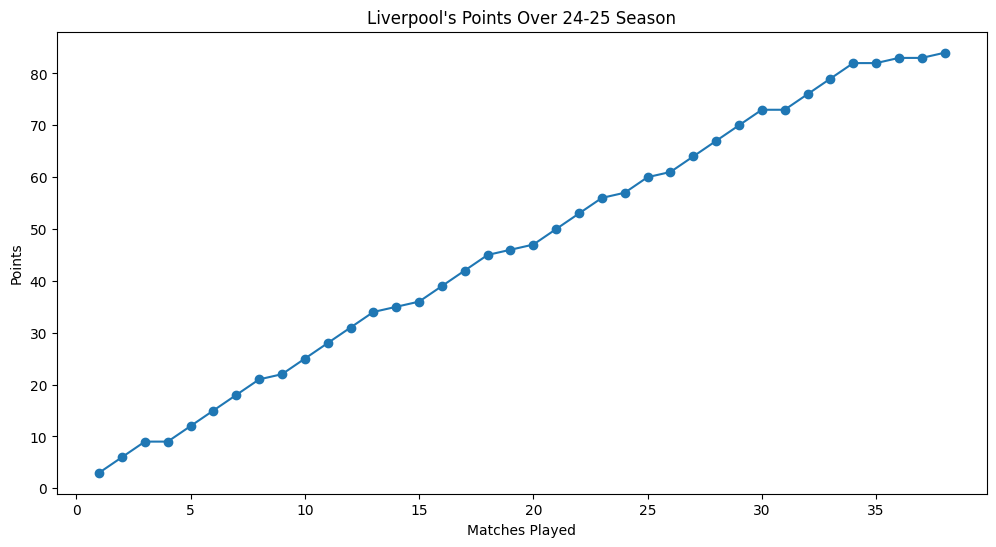

In [40]:
# plot Liverpool's points over the season
plt.figure(figsize = (12, 6))
plt.plot(liverpool_matches['Points'], marker = 'o', linestyle = '-')
plt.title("Liverpool's Points Over 24-25 Season")
plt.xlabel("Matches Played")
plt.ylabel("Points")
plt.show()

In [53]:
# generate a table showing cumulative points for each team
cumulative_points = pd.DataFrame(columns = teams)
for team in teams:
    matches = match_results[(match_results['HomeTeam'] == team) 
                            | (match_results['AwayTeam'] == team)].reset_index(drop = True)
    running_total = 0
    points = []
    for index, row in matches.iterrows():
        if (row['HomeTeam'] == team and row['FTR'] == 'H') or (row['AwayTeam'] == team and row['FTR'] == 'A'):
            running_total += 3
            points.append(running_total)
        elif row['FTR'] == 'D':
            running_total += 1
            points.append(running_total)
        else:
            points.append(running_total)
    cumulative_points[team] = points
cumulative_points.index += 1
cumulative_points.head(10)

,Arsenal,Aston Villa,Bournemouth,Brentford,Brighton,Chelsea,Crystal Palace,Everton,Fulham,Ipswich,Leicester,Liverpool,Man City,Man United,Newcastle,Nott'm Forest,Southampton,Tottenham,West Ham,Wolves
1,3,3,1,3,3,0,0,0,0,0,1,3,3,3,3,1,0,1,0,0
2,6,3,2,3,6,3,0,0,3,0,1,6,6,3,4,4,0,4,3,0
3,7,6,5,6,7,4,1,0,4,1,1,9,9,3,7,5,0,4,3,1
4,10,9,5,6,8,7,2,0,5,2,2,9,12,6,10,8,0,4,4,1
5,11,12,5,6,9,10,3,1,8,3,3,12,13,7,10,9,1,7,4,1
6,14,13,8,7,9,13,3,4,11,4,3,15,14,7,11,9,1,10,5,1
7,17,14,8,10,12,14,3,5,11,4,6,18,17,8,12,10,1,10,8,1
8,17,17,11,10,15,14,3,8,11,4,9,21,20,11,12,13,1,13,8,1
9,18,18,12,13,16,17,6,9,12,4,9,22,23,11,12,16,1,13,11,2
10,18,18,15,13,16,18,7,9,15,5,10,25,23,12,15,19,4,16,11,3


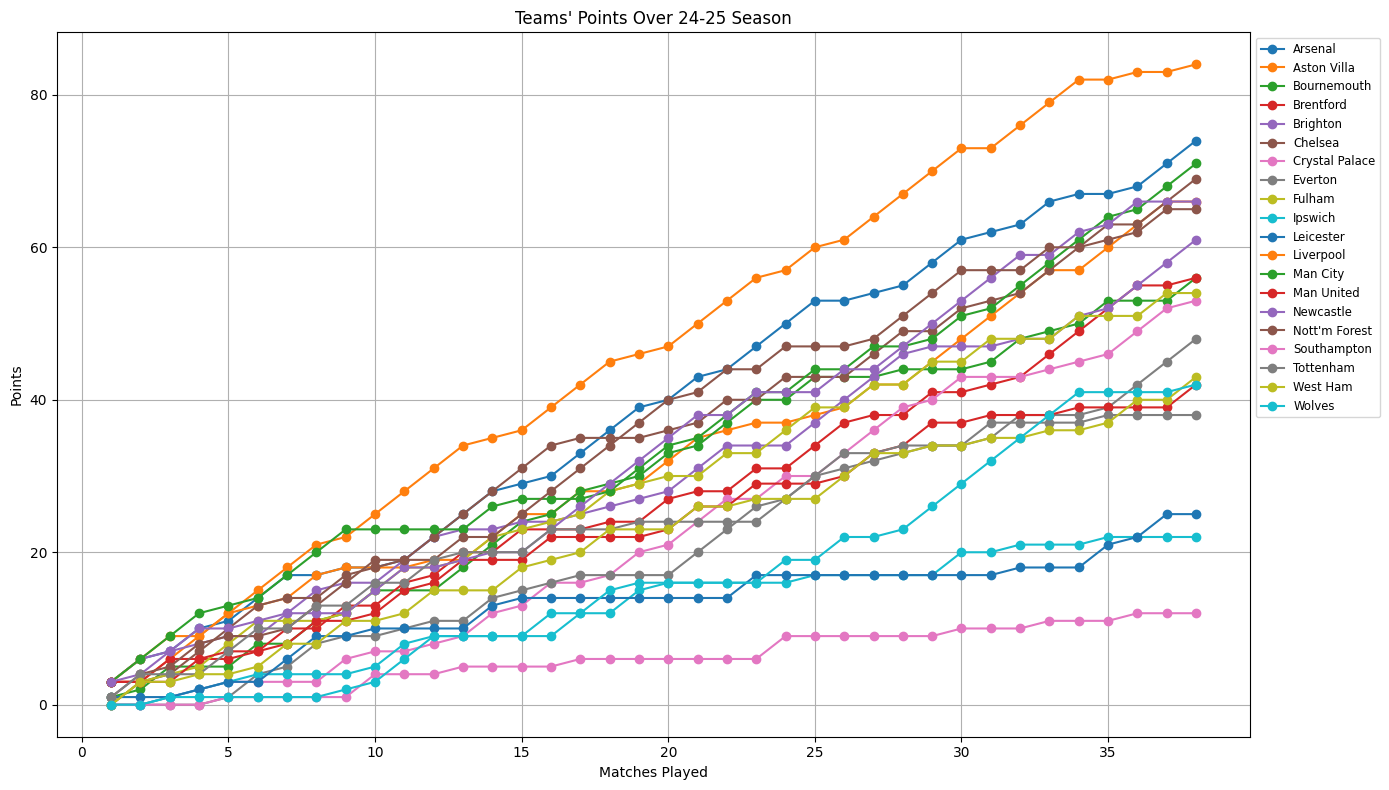

In [ ]:
# plot teams' points over the season
running_totals_plot = plt.figure(figsize = (14, 8))
for team in teams:
    plt.plot(cumulative_points[team], label = team, marker = 'o', linestyle = '-')
plt.title("Teams' Points Over 24-25 Season")
plt.xlabel("Matches Played")
plt.ylabel("Points")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 'small')
plt.grid()
plt.tight_layout()
plt.show()

### Which teams had the most comeback games?

TODO: change definition of comeback games to include when the team down at halftime ties the game up (full time is a draw after one team was leading)

We'll define a comeback game as one where a team has less goals scored than the other at halftime but more goals scored than the other at full time. 

Going to start by solely looking at the stats pertaining to what happend during the games rather than any of the data associated with the sports betting. Since we know the games are also all from the Premier League we can ignore the `Div` column.

In [41]:
# subset of data for match stats
match_stat_cols = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
                   'HTHG', 'HTAG', 'HTR']
match_data = data_2024_2025[match_stat_cols]
match_data.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,Man United,Fulham,1,0,H,0,0,D
1,Ipswich,Liverpool,0,2,A,0,0,D
2,Arsenal,Wolves,2,0,H,1,0,H
3,Everton,Brighton,0,3,A,0,1,A
4,Newcastle,Southampton,1,0,H,1,0,H
5,Nott'm Forest,Bournemouth,1,1,D,1,0,H
6,West Ham,Aston Villa,1,2,A,1,1,D
7,Brentford,Crystal Palace,2,1,H,1,0,H
8,Chelsea,Man City,0,2,A,0,1,A
9,Leicester,Tottenham,1,1,D,0,1,A


In [42]:
# find games where a team was down at halftime but won the match
upsets = match_data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR']].copy()
upsets['Upset'] = np.where((upsets['HTR'] == 'H') & (upsets['FTR'] == 'A') | 
                           (upsets['HTR'] == 'A') & (upsets['FTR'] == 'H'), True, False)
upsets = upsets[upsets['Upset'] == True].reset_index(drop = True)
print(f"Number of upset games: {len(upsets)}")

Number of upset games: 29


The number of comeback games in the 2024-25 season was 29 or approximately 7.6% of the games in the season. 

In [43]:
# find number of upset wins by team
vals = np.array([teams, [0] * len(teams), [0] * len(teams), [0] * len(teams)]).T
team_upsets = pd.DataFrame(data = vals, 
                           index = None, 
                           columns = ['Team', 'Home Upset Wins', 'Away Upset Wins', 'Total Upset Wins'])
team_upsets.set_index('Team', inplace = True)

# change numeric columns to int
cols = ['Home Upset Wins', 'Away Upset Wins', 'Total Upset Wins']
team_upsets[cols] = team_upsets[cols].astype(int)

# count upset wins by team
for index, row in upsets.iterrows():
    if row['FTR'] == 'H':
        team_upsets.loc[row['HomeTeam'], 'Home Upset Wins'] += 1
        team_upsets.loc[row['HomeTeam'], 'Total Upset Wins'] += 1
    elif row['FTR'] == 'A':
        team_upsets.loc[row['AwayTeam'], 'Away Upset Wins'] += 1
        team_upsets.loc[row['AwayTeam'], 'Total Upset Wins'] += 1

# display team upsets
team_upsets = team_upsets[team_upsets['Total Upset Wins'] > 0]
team_upsets.sort_values(by = 'Total Upset Wins', ascending = False, inplace = True)
team_upsets.reset_index(inplace = True)
team_upsets

,Team,Home Upset Wins,Away Upset Wins,Total Upset Wins
0,Fulham,1,4,5
1,Brighton,3,1,4
2,Aston Villa,3,0,3
3,Chelsea,1,2,3
4,Man United,2,1,3
5,Bournemouth,0,2,2
6,Leicester,0,2,2
7,Liverpool,2,0,2
8,Newcastle,0,2,2
9,Everton,1,0,1


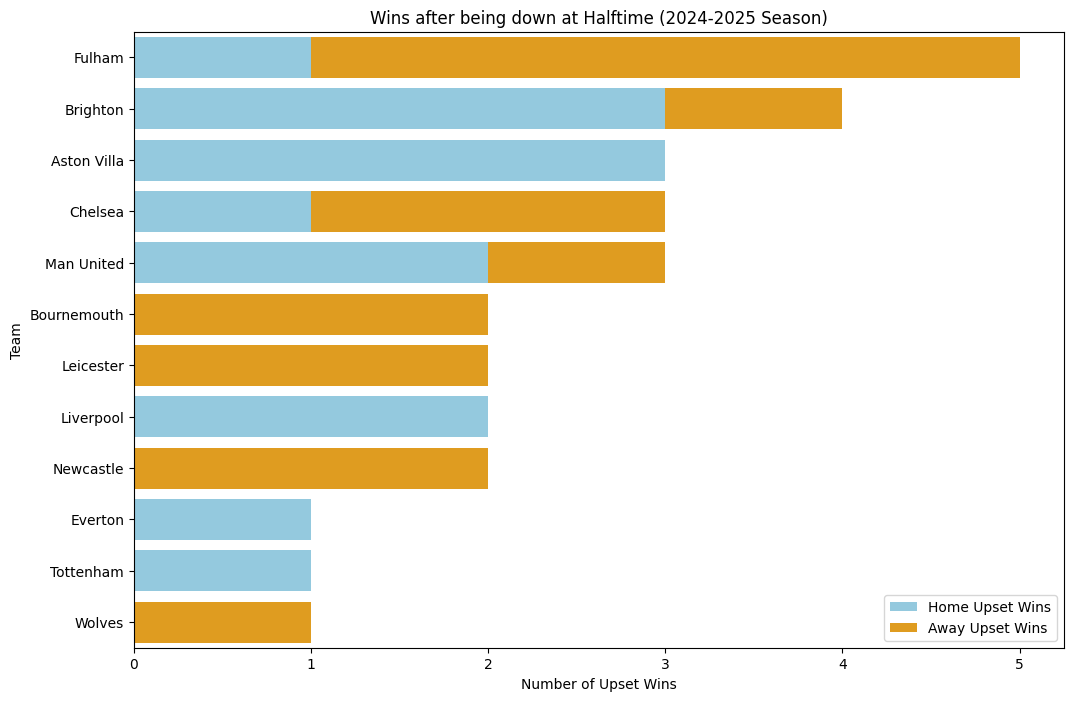

In [44]:
# display upset wins by team
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Home Upset Wins', y = 'Team', data = team_upsets,
    color = 'skyblue', label = 'Home Upset Wins'
)
sns.barplot(x = 'Away Upset Wins', y = 'Team', data = team_upsets,
    color = 'orange', label = 'Away Upset Wins',
    left = team_upsets['Home Upset Wins']
)
plt.title('Wins after being down at Halftime (2024-2025 Season)')
plt.xlabel('Number of Upset Wins')
plt.legend()
plt.show()

The graph of comeback wins includes three of the 'Big Six' teams; Liverpool, Tottenham, and Chelsea. Thus most of these comeback teams coming from weaker sides, perhaps upsetting one of the higher-caliber teams. 